In [32]:
import pandas as pd
from numpy import *
import math
import matplotlib.pyplot as plt
from datetime import date     #calculating age
from datetime import datetime #converting string to date


In [9]:
dataSet = pd.read_csv("./data/vehicle_loan_data/train.csv", sep=",")
print(dataSet.shape)
dataSet.head()

# dataSet = dataSet.sample(n=1000000, random_state=3)

(233154, 41)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date_of_Birth,Employment_Type,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_6_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01/01/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31/07/1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24/08/1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30/12/1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [23]:
dataSet.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_6_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,148.726408,229.149412,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,57.841967,90.005744,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,102.000000,175.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,190.000000,292.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,190.000000,292.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,191.000000,293.000000,36.000000,1.000000


In [24]:
dataSet.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7659
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

In [27]:
dataSet["Employment_Type"].value_counts()
dataSet = dataSet.fillna(dataSet.mode().iloc[0])

In [12]:
print(dataSet.shape)
# dataSet[~dataSet["id"].isnull()].head()

dataSet[["branch_id", "supplier_id", "manufacturer_id", "Employment_Type", "Employee_code_ID"]].head()

# dataSet.loc[dataSet.loan_amnt == 2500, "loan_amnt"].head()

(233154, 41)


,branch_id,supplier_id,manufacturer_id,Employment_Type,Employee_code_ID
0,67,22807,45,Salaried,1998
1,67,22807,45,Self employed,1998
2,67,22807,45,Self employed,1998
3,67,22807,45,Self employed,1998
4,67,22807,45,Self employed,1998


In [13]:
print(set(dataSet["Employment_Type"]))
dataSet[["Employment_Type"]].head()

# data-format: 
# attribute term


for num, value in enumerate(set(dataSet["Employment_Type"]), start=0):
    dataSet.loc[dataSet.Employment_Type == value, "Employment_Type"] = num
    
print(set(dataSet["Employment_Type"]))
# 0: 36 months
# 1: 60 months

{nan, 'Self employed', 'Salaried'}
{nan, 1, 2}


In [17]:
print(set(["AVERAGE_ACCT_AGE"]))
dataSet[["AVERAGE_ACCT_AGE"]].head()
for num, value in enumerate(set(dataSet["AVERAGE_ACCT_AGE"]), start=0):
    dataSet.loc[dataSet.AVERAGE_ACCT_AGE == value, "AVERAGE_ACCT_AGE"] = num
    
print(set(dataSet["AVERAGE_ACCT_AGE"]))    

{'AVERAGE_ACCT_AGE'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191}


In [18]:
print(set(["CREDIT_HISTORY_LENGTH"]))
dataSet[["CREDIT_HISTORY_LENGTH"]].head()
for num, value in enumerate(set(dataSet["CREDIT_HISTORY_LENGTH"]), start=0):
    dataSet.loc[dataSet.CREDIT_HISTORY_LENGTH == value, "CREDIT_HISTORY_LENGTH"] = num
    
print(set(dataSet["CREDIT_HISTORY_LENGTH"]))    

{'CREDIT_HISTORY_LENGTH'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [21]:
categorical_attrs = dataSet.select_dtypes(include=['category', object])
display(categorical_attrs.columns.values)

print("Employment_Type")
print(categorical_attrs["Employment_Type"].value_counts())

for num, value in enumerate(set(dataSet["Employment_Type"]), start=0):
    dataSet.loc[dataSet.CREDIT_HISTORY_LENGTH == value, "Employment_Type"] = num
    
print(set(dataSet["Employment_Type"]))
print(set(categorical_attrs["Employment_Type"]))
print(dataSet["Employment_Type"].value_counts())



print("Employment_Type")
print(categorical_attrs["Employment_Type"].value_counts())
print(set(categorical_attrs["Employment_Type"].values))


array(['Date_of_Birth', 'Employment_Type', 'DisbursalDate',
       'PERFORM_CNS_SCORE_DESCRIPTION'], dtype=object)

Employment_Type
1    127635
2     97858
Name: Employment_Type, dtype: int64
{nan, 1, 2}
{nan, 1, 2}
1    127678
2     97817
Name: Employment_Type, dtype: int64
Employment_Type
1    127635
2     97858
Name: Employment_Type, dtype: int64
{nan, 1, 2}


In [ ]:
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date_of_Birth                             0
Employment_Type                        7659
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT                     0
SEC_DISBURSED_AMOUNT                      0
PRIMARY_INSTAL_AMT                        0
SEC_INSTAL_AMT                            0
NEW_ACCTS_IN_LAST_6_MONTHS                0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS       0
AVERAGE_ACCT_AGE                          0
CREDIT_HISTORY_LENGTH                     0
NO_OF_INQUIRIES                           0
loan_default                              0
dtype: int64

In [47]:

selected_attr = dataSet[["branch_id", "supplier_id", "Date_of_Birth", "Employment_Type", "State_ID", "Employee_code_ID", "Driving_flag", "PRI_ACTIVE_ACCTS", "PRI_CURRENT_BALANCE", "AVERAGE_ACCT_AGE","CREDIT_HISTORY_LENGTH"]]

print(selected_attr.shape)
display(selected_attr.head())

(233154, 11)


,branch_id,supplier_id,Date_of_Birth,Employment_Type,State_ID,Employee_code_ID,Driving_flag,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,67,22807,01/01/1984,2,6,1998,0,0,0,190,292
1,67,22807,31/07/1985,1,6,1998,0,1,27600,163,257
2,67,22807,24/08/1985,1,6,1998,0,0,0,190,292
3,67,22807,30/12/1993,1,6,1998,0,0,0,137,201
4,67,22807,09/12/1977,1,6,1998,0,0,0,190,292


In [48]:
select_3_attr = selected_attr

print("select_3_attr")
select_3_attr["branch_id"] = select_3_attr["branch_id"].astype('int32')
display(select_3_attr.head())

select_3_attr


C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,branch_id,supplier_id,Date_of_Birth,Employment_Type,State_ID,Employee_code_ID,Driving_flag,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,67,22807,01/01/1984,2,6,1998,0,0,0,190,292
1,67,22807,31/07/1985,1,6,1998,0,1,27600,163,257
2,67,22807,24/08/1985,1,6,1998,0,0,0,190,292
3,67,22807,30/12/1993,1,6,1998,0,0,0,137,201
4,67,22807,09/12/1977,1,6,1998,0,0,0,190,292


In [49]:
# select_3_attr["is_duplicate"]= select_3_attr.duplicated()

# select only 1000 rows:
# select_3_attr = select_3_attr.sample(n=1000000, random_state=3)
select_3_attr.shape

display(select_3_attr)

,branch_id,supplier_id,Date_of_Birth,Employment_Type,State_ID,Employee_code_ID,Driving_flag,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,67,22807,01/01/1984,2,6,1998,0,0,0,190,292
1,67,22807,31/07/1985,1,6,1998,0,1,27600,163,257
2,67,22807,24/08/1985,1,6,1998,0,0,0,190,292
3,67,22807,30/12/1993,1,6,1998,0,0,0,137,201
4,67,22807,09/12/1977,1,6,1998,0,0,0,190,292
...,...,...,...,...,...,...,...,...,...,...,...
233149,34,20700,01/08/1988,2,6,3705,0,3,390443,77,267
233150,34,23775,05/12/1988,1,6,3705,0,0,0,180,277
233151,77,22186,01/06/1976,2,4,3479,0,0,0,190,292
233152,77,22186,26/03/1994,2,4,3479,0,0,0,190,292


In [51]:
# select_3_attr[0:10]

# select_3_attr['str_list'] = select_3_attr.apply(lambda row: ' '.join([str(val) for val in row]), axis=1)
select_3_attr['str_list'] = select_3_attr.apply(lambda row: ' '.join(row.dropna().astype(str).values.tolist()), axis=1)


select_3_attr['str_list']

C:\Users\Tham Nguyen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0         67 22807 01/01/1984 2 6 1998 0 0 0 190 292 67 ...
1         67 22807 31/07/1985 1 6 1998 0 1 27600 163 257...
2         67 22807 24/08/1985 1 6 1998 0 0 0 190 292 67 ...
3         67 22807 30/12/1993 1 6 1998 0 0 0 137 201 67 ...
4         67 22807 09/12/1977 1 6 1998 0 0 0 190 292 67 ...
                                ...                        
233149    34 20700 01/08/1988 2 6 3705 0 3 390443 77 267...
233150    34 23775 05/12/1988 1 6 3705 0 0 0 180 277 34 ...
233151    77 22186 01/06/1976 2 4 3479 0 0 0 190 292 77 ...
233152    77 22186 26/03/1994 2 4 3479 0 0 0 190 292 77 ...
233153    77 22186 18/02/1984 2 4 3479 0 0 0 190 292 77 ...
Name: str_list, Length: 233154, dtype: object

In [52]:
histogram_data = pd.DataFrame(select_3_attr['str_list'].value_counts().values, index=select_3_attr['str_list'].value_counts().index, columns=['Count'])

In [53]:
histogram_data = pd.DataFrame(selected_attr)

In [54]:
print("histogram_data")

select_3_attr['str_list'].value_counts().values

histogram_data = pd.DataFrame({"DOMAIN": select_3_attr['str_list'].value_counts().index, "COUNT": select_3_attr['str_list'].value_counts().values})

histogram_data.shape

histogram_data


(227291, 2)

In [55]:
histogram_data.insert(loc=0, column='ID', value=histogram_data.index)


In [56]:
histogram_data

,ID,DOMAIN,COUNT
0,0,120 20512 01/01/1985 1 12 184 0 0 0 190 292 12...,12
1,1,120 23411 01/01/1992 1 12 1150 0 0 0 190 292 1...,11
2,2,120 21514 01/01/1994 1 12 2337 0 0 0 190 292 1...,11
3,3,120 23452 01/01/1994 1 12 3132 0 0 0 190 292 1...,9
4,4,10 18471 01/01/1987 1 3 2107 0 0 0 190 292 10 ...,9
...,...,...,...
227286,227286,202 23318 01/06/1990 2 18 992 0 0 0 190 292 20...,1
227287,227287,217 24574 06/02/1991 1 7 3593 0 0 0 190 292 21...,1
227288,227288,3 14764 15/02/1992 2 1 1018 0 6 90964 40 25 3 ...,1
227289,227289,152 15808 01/11/1993 1 3 676 0 0 0 190 292 152...,1


In [62]:
print("Employee_code_ID MAX",select_3_attr["Employee_code_ID"].max())
print("Employee_code_ID MIN",select_3_attr["Employee_code_ID"].min())
print()

print("PRI_ACTIVE_ACCTS MAX",select_3_attr["PRI_ACTIVE_ACCTS"].max())
print("PRI_ACTIVE_ACCTS MIN",select_3_attr["PRI_ACTIVE_ACCTS"].min())
print()

print("PRI_CURRENT_BALANCE MAX",select_3_attr["PRI_CURRENT_BALANCE"].max())
print("PRI_CURRENT_BALANCE MIN",select_3_attr["PRI_CURRENT_BALANCE"].min())
print()

print("AVERAGE_ACCT_AGE MAX", select_3_attr["AVERAGE_ACCT_AGE"].max())
print("AVERAGE_ACCT_AGE MIN", select_3_attr["AVERAGE_ACCT_AGE"].min())
print()

print("CREDIT_HISTORY_LENGTH MAX", select_3_attr["CREDIT_HISTORY_LENGTH"].max())
print("CREDIT_HISTORY_LENGTH MIN", select_3_attr["CREDIT_HISTORY_LENGTH"].min())
print()

print("branch_id", len(set(select_3_attr.branch_id.values)))
print("supplier_id",len(set(select_3_attr.supplier_id.values)))
print("Date_of_Birth", len(set(select_3_attr.Date_of_Birth.values)))
print("Employment_Type", len(set(select_3_attr.Employment_Type.values)))
print("State_ID", len(set(select_3_attr.State_ID.values)))
print("Driving_flag", len(set(select_3_attr.Driving_flag.values)))

# print(select_3_attr.columns)

with open("attributeStat_VehicleLoans.txt", "w") as text_file:
    text_file.write("branch_id: %d\n" % len(set(select_3_attr.branch_id.values)))
    text_file.write("supplier_id: %d\n" % len(set(select_3_attr.supplier_id.values)))
    text_file.write("Date_of_Birth: %d\n" % len(set(select_3_attr.Date_of_Birth.values)))
    text_file.write("Employment_Type: %d\n" % len(set(select_3_attr.Employment_Type.values)))
    text_file.write("State_ID: %d\n" % len(set(select_3_attr.State_ID.values)))
    text_file.write("Employee_code_ID: %d\n" % len(set(select_3_attr.Employee_code_ID.values)))
    text_file.write("Driving_flag: %d\n" % len(set(select_3_attr.Driving_flag.values)))
    text_file.write("PRI_ACTIVE_ACCTS: %d\n" % len(set(select_3_attr.PRI_ACTIVE_ACCTS.values)))
    text_file.write("PRI_CURRENT_BALANCE: %d\n" % len(set(select_3_attr.PRI_CURRENT_BALANCE.values)))
    text_file.write("AVERAGE_ACCT_AGE: %d\n" % len(set(select_3_attr.AVERAGE_ACCT_AGE.values)))
    text_file.write("CREDIT_HISTORY_LENGTH: %d\n" % len(set(select_3_attr.CREDIT_HISTORY_LENGTH.values)))
#     text_file.write("AVERAGE_ACCT_AGE: %d\n" % len(set(select_3_attr.home_ownership.values)))

Employee_code_ID MAX 3795
Employee_code_ID MIN 1

PRI_ACTIVE_ACCTS MAX 144
PRI_ACTIVE_ACCTS MIN 0

PRI_CURRENT_BALANCE MAX 96524920
PRI_CURRENT_BALANCE MIN -6678296

AVERAGE_ACCT_AGE MAX 191
AVERAGE_ACCT_AGE MIN 0

CREDIT_HISTORY_LENGTH MAX 293
CREDIT_HISTORY_LENGTH MIN 0

branch_id 82
supplier_id 2953
Date_of_Birth 15433
Employment_Type 2
State_ID 22
Driving_flag 2


,ID,DOMAIN,COUNT
0,0,120 20512 01/01/1985 1 12 184 0 0 0 190 292 12...,12
1,1,120 23411 01/01/1992 1 12 1150 0 0 0 190 292 1...,11
2,2,120 21514 01/01/1994 1 12 2337 0 0 0 190 292 1...,11
3,3,120 23452 01/01/1994 1 12 3132 0 0 0 190 292 1...,9
4,4,10 18471 01/01/1987 1 3 2107 0 0 0 190 292 10 ...,9
...,...,...,...
227286,227286,202 23318 01/06/1990 2 18 992 0 0 0 190 292 20...,1
227287,227287,217 24574 06/02/1991 1 7 3593 0 0 0 190 292 21...,1
227288,227288,3 14764 15/02/1992 2 1 1018 0 6 90964 40 25 3 ...,1
227289,227289,152 15808 01/11/1993 1 3 676 0 0 0 190 292 152...,1


223161
(227291, 3)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12]
1     0.981829
2     0.013472
3     0.003106
4     0.000911
5     0.000312
6     0.000216
7     0.000097
8     0.000018
9     0.000026
11    0.000009
12    0.000004
Name: COUNT, dtype: float64


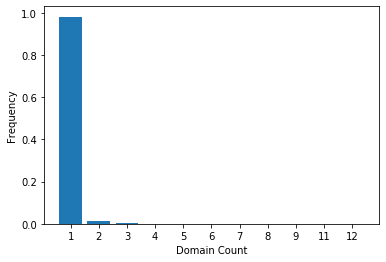

In [65]:

import matplotlib.pyplot as plt

# display(set(histogram_data["COUNT"]))

display(histogram_data)

print(len(histogram_data[histogram_data["COUNT"] == 1].values))
print(histogram_data.shape)

# histogram_data.hist(column="COUNT")



class_labels = sorted(set(histogram_data.iloc[:,-1]))
class_counts = histogram_data.iloc[:,-1].value_counts(normalize=True).sort_index()
print(class_labels)
print(class_counts)

xs = [i + 0.1 for i, _ in enumerate(class_labels)]

plt.bar(xs, class_counts)

plt.ylabel("Frequency")
plt.xlabel("Domain Count")
plt.xticks([i + 0.1 for i, _ in enumerate(class_labels)],class_labels)
plt.savefig('Histogram_uniqueness_vehicle_loan.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [58]:
display(histogram_data.shape)
one_count_domains = histogram_data[histogram_data["COUNT"] == 1]

one_count_domains = one_count_domains[0:1000000]
# .sample(n=1000000, random_state=3)

print("total sum of domain with count 1: ", sum(one_count_domains["COUNT"].values))

one_count_domains = one_count_domains.reset_index(drop=True) 
one_count_domains["ID"] = one_count_domains.index

one_count_domains

(227291, 3)

total sum of domain with count 1:  223161


,ID,DOMAIN,COUNT
0,0,34 22637 01/01/1975 2 6 245 0 1 0 69 159 34 22...,1
1,1,10 22524 06/12/1986 1 3 2009 0 0 0 190 292 10 ...,1
2,2,73 22689 02/06/1982 2 11 2024 0 2 24303 127 18...,1
3,3,135 20878 07/01/1987 1 4 2128 0 1 0 96 256 135...,1
4,4,8 17528 23/10/1996 1 3 861 0 0 0 190 292 8 175...,1
...,...,...,...
223156,223156,202 23318 01/06/1990 2 18 992 0 0 0 190 292 20...,1
223157,223157,217 24574 06/02/1991 1 7 3593 0 0 0 190 292 21...,1
223158,223158,3 14764 15/02/1992 2 1 1018 0 6 90964 40 25 3 ...,1
223159,223159,152 15808 01/11/1993 1 3 676 0 0 0 190 292 152...,1


In [59]:
# histogram_data.to_csv("histogram_data.csv",index=False)

one_count_domains.to_csv("unique_domains_vehicle_loans.csv",index=False)

In [63]:
data = pd.read_csv("./unique_domains_vehicle_loans.csv", sep=",")
print(data.shape)
data.head()

(223161, 3)


,ID,DOMAIN,COUNT
0,0,34 22637 01/01/1975 2 6 245 0 1 0 69 159 34 22...,1
1,1,10 22524 06/12/1986 1 3 2009 0 0 0 190 292 10 ...,1
2,2,73 22689 02/06/1982 2 11 2024 0 2 24303 127 18...,1
3,3,135 20878 07/01/1987 1 4 2128 0 1 0 96 256 135...,1
4,4,8 17528 23/10/1996 1 3 861 0 0 0 190 292 8 175...,1


In [64]:
data_200K = data.iloc[0:200000, :]
print(data_200K.shape)
data_200K.head()
# know_data_500 = data_500.sample(frac=0.01, random_state=3)
know_data_200K = data_200K.sample(n=500, random_state=3)
know_data_200K.to_csv("Vehicle_loan_known_domains_n_200K_L_500.csv",index=False)

(200000, 3)
